[[0.  0.6 0.2 0.3 0.  0.8]
 [0.6 0.  0.  0.8 0.9 0. ]
 [0.2 0.  0.  0.1 0.7 0.9]
 [0.3 0.8 0.1 0.  0.3 0. ]
 [0.  0.9 0.7 0.3 0.  0.4]
 [0.8 0.  0.9 0.  0.4 0. ]]


{'a': Text(0.0694378901221419, -0.5207710042650198, 'a'),
 'b': Text(0.6821348317793701, 0.3822392031185268, 'b'),
 'c': Text(-0.8684812402911732, 0.2589689078428516, 'c'),
 'd': Text(1.0, -0.17043432300671785, 'd'),
 'e': Text(-0.07710890585174168, 0.490931907673813, 'e'),
 'f': Text(-0.8059825757585968, -0.44093469136345304, 'f')}

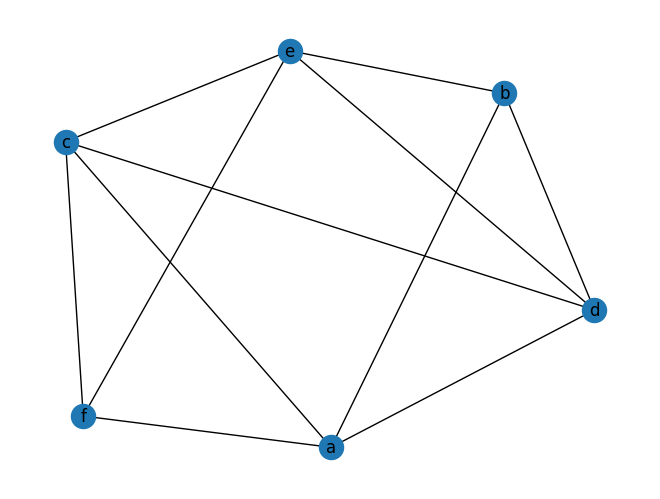

In [1]:
import networkx as nx
import numpy as np
import sympy as sp

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)
G.add_edge("a", "d", weight=0.3)
G.add_edge("f", "e", weight=0.4)
G.add_edge("d", "e", weight=0.3)
G.add_edge("f", "a", weight=0.8)
G.add_edge("b", "d", weight=0.8)
G.add_edge("b", "e", weight=0.9)

print(nx.adjacency_matrix(G).todense())

pos = nx.spring_layout(G)
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)

In [2]:
import sys
sys.path.append("..")
from neurop.Problem import TSPProblem
from neurop.Model import QUBOModel
from neurop.Backend import SimulatedAnnealingBackend

backend = SimulatedAnnealingBackend(np.logspace(5, -1, 100_000))
problem = TSPProblem(G, penalty=10)
model = problem.convert_to_model(QUBOModel, backend)
model.Q

-20*X[0, 0]**2 + 20*X[0, 0]*X[0, 1] + 20*X[0, 0]*X[0, 2] + 20*X[0, 0]*X[0, 3] + 20*X[0, 0]*X[0, 4] + 20*X[0, 0]*X[0, 5] + 20*X[0, 0]*X[1, 0] + 0.6*X[0, 0]*X[1, 1] + 0.6*X[0, 0]*X[1, 5] + 20*X[0, 0]*X[2, 0] + 0.2*X[0, 0]*X[2, 1] + 0.2*X[0, 0]*X[2, 5] + 20*X[0, 0]*X[3, 0] + 0.3*X[0, 0]*X[3, 1] + 0.3*X[0, 0]*X[3, 5] + 20*X[0, 0]*X[4, 0] + 20*X[0, 0]*X[5, 0] + 0.8*X[0, 0]*X[5, 1] + 0.8*X[0, 0]*X[5, 5] - 20*X[0, 1]**2 + 20*X[0, 1]*X[0, 2] + 20*X[0, 1]*X[0, 3] + 20*X[0, 1]*X[0, 4] + 20*X[0, 1]*X[0, 5] + 0.6*X[0, 1]*X[1, 0] + 20*X[0, 1]*X[1, 1] + 0.6*X[0, 1]*X[1, 2] + 0.2*X[0, 1]*X[2, 0] + 20*X[0, 1]*X[2, 1] + 0.2*X[0, 1]*X[2, 2] + 0.3*X[0, 1]*X[3, 0] + 20*X[0, 1]*X[3, 1] + 0.3*X[0, 1]*X[3, 2] + 20*X[0, 1]*X[4, 1] + 0.8*X[0, 1]*X[5, 0] + 20*X[0, 1]*X[5, 1] + 0.8*X[0, 1]*X[5, 2] - 20*X[0, 2]**2 + 20*X[0, 2]*X[0, 3] + 20*X[0, 2]*X[0, 4] + 20*X[0, 2]*X[0, 5] + 0.6*X[0, 2]*X[1, 1] + 20*X[0, 2]*X[1, 2] + 0.6*X[0, 2]*X[1, 3] + 0.2*X[0, 2]*X[2, 1] + 20*X[0, 2]*X[2, 2] + 0.2*X[0, 2]*X[2, 3] + 0.3*X[0

array([[-40. ,  20. ,  20. , ...,   0. ,   0. ,   0.8],
       [ 20. , -40. ,  20. , ...,   0. ,   0. ,   0. ],
       [ 20. ,  20. , -40. , ...,   0.8,   0. ,   0. ],
       ...,
       [  0. ,   0. ,   0.8, ..., -40. ,  20. ,  20. ],
       [  0. ,   0. ,   0. , ...,  20. , -40. ,  20. ],
       [  0.8,   0. ,   0. , ...,  20. ,  20. , -40. ]])

In [3]:
sp.Matrix(model.Q)

Matrix([
[-40.0,  20.0,  20.0,  20.0,  20.0,  20.0,  20.0,   0.6,     0,     0,     0,   0.6,  20.0,   0.2,     0,     0,     0,   0.2,  20.0,   0.3,     0,     0,     0,   0.3,  20.0,     0,     0,     0,     0,     0,  20.0,   0.8,     0,     0,     0,   0.8],
[ 20.0, -40.0,  20.0,  20.0,  20.0,  20.0,   0.6,  20.0,   0.6,     0,     0,     0,   0.2,  20.0,   0.2,     0,     0,     0,   0.3,  20.0,   0.3,     0,     0,     0,     0,  20.0,     0,     0,     0,     0,   0.8,  20.0,   0.8,     0,     0,     0],
[ 20.0,  20.0, -40.0,  20.0,  20.0,  20.0,     0,   0.6,  20.0,   0.6,     0,     0,     0,   0.2,  20.0,   0.2,     0,     0,     0,   0.3,  20.0,   0.3,     0,     0,     0,     0,  20.0,     0,     0,     0,     0,   0.8,  20.0,   0.8,     0,     0],
[ 20.0,  20.0,  20.0, -40.0,  20.0,  20.0,     0,     0,   0.6,  20.0,   0.6,     0,     0,     0,   0.2,  20.0,   0.2,     0,     0,     0,   0.3,  20.0,   0.3,     0,     0,     0,     0,  20.0,     0,     0,     0,     0,   0.

In [5]:
sol_energy, sol_assignment = model.run()
problem_params = model.to_problem_parameters(sol_assignment)
problem_params

Temperature: 0.1  Current energy: -233.59999999995725: 100%|██████████| 100000/100000 [00:04<00:00, 23942.89it/s]               


{'a': 5, 'b': 2, 'c': 4, 'd': 3, 'e': 1, 'f': 0}